# Tokens & Embeddings

## Getting started with text embeddings in Ollama

In [47]:
from langchain_community.embeddings import OllamaEmbeddings

In [48]:
HOST = "http://localhost:11434"
MODEL = "nomic-embed-text:latest"

In [49]:
embeddings_model = OllamaEmbeddings(base_url=HOST, model=MODEL)

In [50]:
text = "What is the meaning of life?"

In [51]:
embedding = embeddings_model.embed_query(text)

In [54]:
vector = embedding
print(f"Length = {len(vector)}")

# print the first 10 values of the embeding vector
print(f"Vector = {vector[:10]}")

Length = 768
Vector = [0.9433161020278931, 0.9402193427085876, -1.3075997829437256, -0.02155333384871483, 1.1473031044006348, 0.6443274617195129, 0.38235166668891907, 0.011896159499883652, 0.000292457640171051, -0.9279967546463013]


In [55]:
doc_result = embeddings_model.embed_documents([text])
print(doc_result)

[[0.5661331415176392, 0.682808518409729, -2.2521793842315674, 0.10869543254375458, 0.6600783467292786, -0.03334936872124672, 0.7574063539505005, 0.48879942297935486, -0.8324041962623596, -0.32832974195480347, 0.4572542905807495, 0.6227372288703918, 1.6935534477233887, 0.37943562865257263, 0.6705105900764465, -1.4200525283813477, -1.4667303562164307, -0.15851649641990662, 0.6069198846817017, 1.5418922901153564, -1.2560312747955322, -0.7361171841621399, -0.8300170302391052, 0.5068650841712952, -0.8239250183105469, 1.5722568035125732, 0.23428800702095032, 1.047973394393921, 0.23372700810432434, 0.14837230741977692, -0.07081837952136993, 0.4917256236076355, 1.351331353187561, 1.2262327671051025, -0.8322862386703491, -0.603233814239502, 1.9610015153884888, 1.450495958328247, 0.946138322353363, -0.10433702915906906, -0.7538183927536011, -0.3097253441810608, -0.6815050840377808, 0.030675478279590607, 0.4036157727241516, -1.1253986358642578, 0.3878467082977295, -0.4894808530807495, 0.162848040

In [56]:
text_2 = "I like vegetarian food"
embedding_2 = embeddings_model.embed_query(text_2)
text_3 = "The red car drives faster than the white one"
embedding_3 = embeddings_model.embed_query(text_3)
text_4 = "I like hamburgers very much"
embedding_4 = embeddings_model.embed_query(text_4)
text_5 = "I hate the new Batman movie"
embedding_5 = embeddings_model.embed_query(text_5)

## Vector similarity

In data analysis, cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors.
The resulting similarity ranges from -1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [60]:
vector =  np.array(embedding).reshape(1, -1)
vector_2 = np.array(embedding_2).reshape(1, -1)
vector_3 = np.array(embedding_3).reshape(1, -1)
vector_4 = np.array(embedding_4).reshape(1, -1)
vector_5 = np.array(embedding_5).reshape(1, -1)

In [61]:
print(cosine_similarity(vector,vector_2)) 
print(cosine_similarity(vector_2,vector_3))
print(cosine_similarity(vector,vector_3))
print(cosine_similarity(vector_4,vector_2))

[[0.31030918]]
[[0.28171222]]
[[0.28101946]]
[[0.33378593]]


### Visualisierung

In [241]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

In [242]:
datafile_path = "../data/fine_food_reviews_1k.csv"
df = pd.read_csv(datafile_path)

In [243]:
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()

In [244]:
df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)

In [245]:
df = df.head(30)

In [246]:
df.head()

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ...."
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...


In [247]:
documents = df['combined'].values

In [248]:
documents

array(['Title: where does one  start...and stop... with a treat like this; Content: Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone',
       'Title: Arrived in pieces; Content: Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.',
       'Title: It isn\'t blanc mange, but isn\'t bad . . .; Content: I\'m not sure that custard is really custard without eggs.  But this comes close.  I got it for use in a "Vegan pancake" recipe.  We were having houseguests who were Vegan and I wanted to make some special breakfasts while they were here.  One of the cooking/recipe sites had a recipe using this and there were lots of great reviews.  I tried the recipe and it turned out like wallpaper paste -- yuck!<br />However, the  so-called custard isn\'t so bad.  I think it\'s probably just cornstarch and annatto (yellow coloring with a sl

### Embed all documents 

In [249]:
document_embeddings = embeddings_model.embed_documents(texts=documents)


In [250]:
len(document_embeddings)

30

In [251]:
print(document_embeddings)

[[0.8417623043060303, 1.7230634689331055, -2.5020389556884766, -0.9118088483810425, -0.3460908532142639, -0.5130841732025146, -0.294880747795105, 0.6582558155059814, -0.10077527165412903, -0.23985029757022858, -0.8540816307067871, -0.6539732813835144, 0.29465317726135254, 0.9242340326309204, -0.12384884059429169, 0.8416025638580322, 0.4342460036277771, 0.0017627179622650146, 0.6732959747314453, 1.8018712997436523, 0.7097549438476562, 0.6128486394882202, 0.5468088984489441, -0.19576290249824524, -0.8993126153945923, -0.40559571981430054, -1.0170866250991821, 1.149606466293335, -1.9693567752838135, -0.09267949312925339, -0.1404486447572708, -1.393667459487915, 0.1809871941804886, -0.4405512809753418, -0.3649340271949768, 0.4419786334037781, 0.6459448337554932, 0.36041128635406494, -0.33231228590011597, 0.40562573075294495, 1.3316359519958496, 0.4661809802055359, -0.149289071559906, -1.632736086845398, 0.3204522132873535, -0.40347495675086975, 1.7720571756362915, -0.7267905473709106, 0.55

In [252]:
embeddings_array = np.array(document_embeddings, dtype=np.float32)

In [253]:
embeddings_array.shape

(30, 768)

### Reduce dimensions with TSNE

In [254]:
tsne = TSNE(n_components=2, perplexity=4, random_state=42, init='random', learning_rate=200)
tsne_results = tsne.fit_transform(embeddings_array)

In [255]:
tsne_results.shape

(30, 2)

In [256]:
tsne_results

array([[-302.65164 ,   49.182915],
       [-281.86014 ,  295.651   ],
       [ -39.80518 , -201.25789 ],
       [-149.2915  ,  -61.376244],
       [-144.18155 ,   39.448215],
       [ -33.08557 , -237.35803 ],
       [ 375.82108 , -207.27771 ],
       [-245.1763  ,   57.858044],
       [ 103.46657 , -275.00464 ],
       [  66.409134, -179.21822 ],
       [ 185.75266 , -198.03012 ],
       [ 131.09634 , -245.01509 ],
       [-249.8693  ,  245.83391 ],
       [-195.17982 ,  258.4837  ],
       [ 133.49202 , -108.15698 ],
       [ -74.88352 ,   48.205856],
       [-217.44655 ,  283.45776 ],
       [-169.83896 ,    8.202023],
       [-277.3764  ,  -25.222343],
       [-223.51321 , -148.9043  ],
       [ 128.01874 , -167.41998 ],
       [ 345.03265 , -162.43806 ],
       [ 116.57884 , -194.4593  ],
       [ 325.94266 , -186.35619 ],
       [-108.614235,   76.12366 ],
       [-237.36748 ,   11.20884 ],
       [-195.38754 ,  330.4361  ],
       [-193.30121 , -144.43176 ],
       [-250.09555 ,

Text(0.5, 1.0, 'Amazon Fine Food ratings visualized in language using t-SNE')

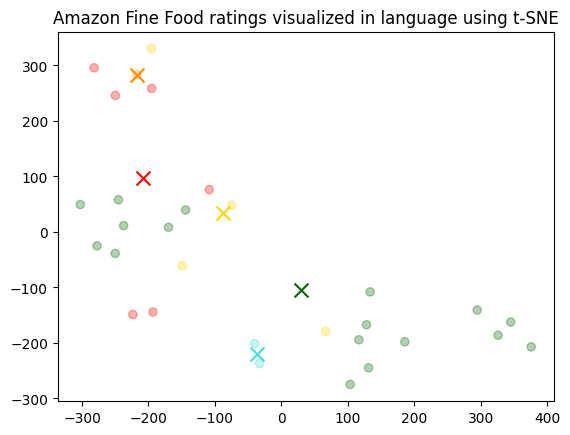

In [258]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in tsne_results]
y = [y for x,y in tsne_results]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon Fine Food ratings visualized in language using t-SNE")

In [230]:
print(df['combined'].values[0])

Title: where does one  start...and stop... with a treat like this; Content: Wanted to save some to bring to my Chicago family but my North Carolina family ate all 4 boxes before I could pack. These are excellent...could serve to anyone
